# Indice Notebbok
- **1)** Dropeo de columnas
- **2)** Creacion de variables dummies
- **3)** Analisis y dropeo de duplicados
- **4)** Nuevas Variables: precio_M2_total y precio_M2_covered
- **5)** Analisis de Outliers en las columnas precio_M2_total y precio_M2_covered
- **6)** Filtro de outliers en las columnas precio_M2_total y precio_M2_covered

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Dropeo de columnas
Importamos el dataSet 'data_limpio.csv' donde aplicamos las diferentes tecnicas de limpieza para poder extraer la mayor informacion posible e intentar salvar la mayor cantidad de datos.
A continuacion dropeamos las siguientes columnas en base al analsisis inicial donde estudiamos e inevstigamos la concetracion de nulos y no nulos y sus respetivos porcentajes entre otras cosas.

In [ ]:
path = 'data_limpio_1.csv'
data = pd.read_csv(path,sep=',')
data.shape

(121220, 37)

In [ ]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0','place_with_parent_names','lat-lon','price_per_m2','price_usd_per_m2','lat', 'lon','rooms_desc','dollar_desc', 'm2_desc','property_desc', 'rooms_title', 'price_title','m2_title', 'property_title'],inplace=True)\

In [ ]:
data.drop(columns=['properati_url','image_thumbnail','expenses','price_aprox_local_currency','currency','price','state_name','country_name','place_name','operation','floor'],inplace=True)

In [ ]:
# Repaso de los nulos de las columnas finales

In [ ]:
data.isnull().sum().sort_values(ascending=False)

rooms                    53626
surface_total_in_m2      27344
price_aprox_usd          20518
geonames_id              18717
surface_covered_in_m2    16739
Barrio                    4780
description                  2
Provincia                    0
title                        0
property_type                0
dtype: int64

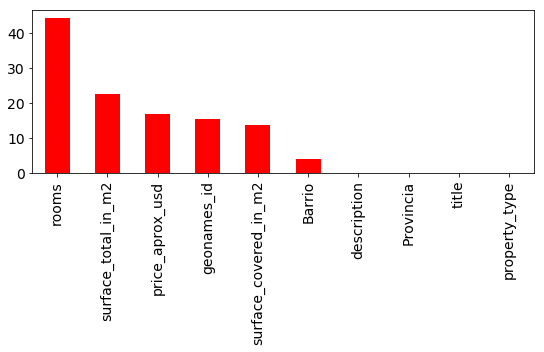

In [ ]:
porcentaje=(data.isnull().sum()/data.shape[0])*100
porcentaje=porcentaje.sort_values(ascending=False)
plt.figure(figsize=(9, 3))
porcentaje.plot(kind="bar", fontsize=14, color="r");

# 2) Creacion de variablesDummies
Considerando la columna 'property_type' que era una variable categorica decidimos aplicarle el metodod .get_dummies **mejrar**

In [ ]:
data = pd.get_dummies(data,columns=['property_type'],prefix='propiedad',drop_first=False)

In [ ]:
data.dtypes

geonames_id              float64
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
rooms                    float64
description               object
title                     object
Provincia                 object
Barrio                    object
propiedad_PH               uint8
propiedad_apartment        uint8
propiedad_house            uint8
propiedad_store            uint8
dtype: object

In [ ]:
data.head(5)

,geonames_id,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,description,title,Provincia,Barrio,propiedad_PH,propiedad_apartment,propiedad_house,propiedad_store
0,3430787.0,62000.0,55.0,40.0,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,1,0,0,0
1,3432039.0,150000.0,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,0,1,0,0
2,3430787.0,72000.0,55.0,55.0,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,0,1,0,0
3,3431333.0,95000.0,NaN,NaN,3.0,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Capital Federal,Liniers,1,0,0,0
4,3435548.0,64000.0,35.0,35.0,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,0,1,0,0


# 3) Analisis y dropeo de duplicados

In [ ]:
mascara = data.duplicated(keep='first')
print(mascara.sum())
data_prueba = data.loc[mascara,:]
data_prueba.groupby('Provincia').size().sort_values(ascending=False)

5516


Provincia
Capital Federal                 1647
Santa Fe                        1150
Bs.As. G.B.A. Zona Norte         944
Córdoba                          551
Bs.As. G.B.A. Zona Sur           414
Bs.As. G.B.A. Zona Oeste         299
Neuquén                          151
Buenos Aires Costa Atlántica     108
Misiones                          59
Buenos Aires Interior             41
Tucumán                           39
Formosa                           33
Mendoza                           25
Río Negro                         19
Entre Ríos                        15
Corrientes                         8
San Luis                           7
La Pampa                           4
Salta                              2
dtype: int64

In [ ]:
#Repeticiones multiples
data_repeticiones_multiples = data_prueba.duplicated(keep='first').sum()
data_repeticiones_multiples

2673

# Conclusion
Para considerar los duplicados tuvimos en cuenta las columnas 'geonames_id', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'description', 'title', 'Provincia','Barrio', 'propiedad_PH', 'propiedad_apartment', 'propiedad_house', 'propiedad_store' ya que consideramos que estas variables son clave a la hora de determinar si un dato es duplicado o no. **Teniendo en cuenta especialemte las columnas** '**geonames_id**' ,'**title**' y '**description**' como variables que permiten determinar la existencia de duplicados ya que serian variables unicas para cada caso.

## Dropeamos duplicados

In [ ]:
data.shape

(121220, 13)

In [ ]:
data.drop_duplicates(keep='first',inplace=True,ignore_index=False)

In [ ]:
data.shape

(115704, 13)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

rooms                    50615
surface_total_in_m2      26761
geonames_id              18052
price_aprox_usd          17469
surface_covered_in_m2    16295
Barrio                    4402
description                  2
propiedad_store              0
propiedad_house              0
propiedad_apartment          0
propiedad_PH                 0
Provincia                    0
title                        0
dtype: int64

In [ ]:
(data.isnull().sum()/data.shape[0]*100).round(2).sort_values(ascending=False)

rooms                    43.75
surface_total_in_m2      23.13
geonames_id              15.60
price_aprox_usd          15.10
surface_covered_in_m2    14.08
Barrio                    3.80
propiedad_store           0.00
propiedad_house           0.00
propiedad_apartment       0.00
propiedad_PH              0.00
Provincia                 0.00
title                     0.00
description               0.00
dtype: float64

Luego de eliminar los duplicados nos podemos dar cuenta que en ciertas variables disminuyo el nivel de nulos mejorando aun mas la calidad del dataSet.
Ademas luego del analisis de duplicados decidimos dropear las columnas 'geonames_id', 'title','description','rooms'.

In [ ]:
data.drop(columns=['geonames_id','title','description','rooms'],inplace=True)

In [ ]:
data.describe().round(2)

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,propiedad_PH,propiedad_apartment,propiedad_house,propiedad_store
count,98235.00,88943.00,99409.00,115704.00,115704.00,115704.00,115704.00
mean,240599.01,203.72,125.84,0.05,0.57,0.34,0.04
std,365325.17,1088.13,318.29,0.21,0.49,0.47,0.18
min,10000.00,10.00,10.00,0.00,0.00,0.00,0.00
25%,90000.00,49.00,45.00,0.00,0.00,0.00,0.00
50%,145000.00,78.00,75.00,0.00,1.00,0.00,0.00
75%,268159.22,180.00,150.00,0.00,1.00,1.00,0.00
max,25000000.00,154438.00,30000.00,1.00,1.00,1.00,1.00


# 4) Nuevas Variables: precio_M2_total y precio_M2_covered
Para poder crear estas columnas, necesitamos que cierta informacion no sea nula. En nuestra caso, el criterio de corte fue que no haya nulos en las columnas de 'surface_covered_in_m2, 'surface_total_in_m2, 'price_aprox_usd' y 'Barrio' ya que son columnas fundamentales para el desarollo y analisis de la variale target (precio_M2)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

surface_total_in_m2      26761
price_aprox_usd          17469
surface_covered_in_m2    16295
Barrio                    4402
propiedad_store              0
propiedad_house              0
propiedad_apartment          0
propiedad_PH                 0
Provincia                    0
dtype: int64

In [ ]:
#Generamos una mascara
mascara_final = data.surface_total_in_m2.notnull() & data.surface_covered_in_m2.notnull() & data.price_aprox_usd.notnull() & data.Barrio.notnull()

#Creamos el dataSet final con los valores que cumplan con la mascara
data_final = data.loc[mascara_final,:]

#Imprimimos el total de filas y columnas
print(data_final.shape)

#Chequeamos que no haya ningun valor nulo
data_final.isnull().sum()

(73047, 9)


price_aprox_usd          0
surface_total_in_m2      0
surface_covered_in_m2    0
Provincia                0
Barrio                   0
propiedad_PH             0
propiedad_apartment      0
propiedad_house          0
propiedad_store          0
dtype: int64

# Columna: precio_m2_total

In [ ]:
data_final['precio_M2_total'] = pd.Series(data_final.price_aprox_usd/data_final.surface_total_in_m2).astype(np.float).round(2)

C:\Users\Agustin Esposito\.conda\envs\dhsblend2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Chequemos que se haya Creado Correctamente
data_final.dtypes

price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
Provincia                 object
Barrio                    object
propiedad_PH               uint8
propiedad_apartment        uint8
propiedad_house            uint8
propiedad_store            uint8
precio_M2_total          float64
dtype: object

In [ ]:
data_final.precio_M2_total.describe().round(2)

count     73047.00
mean       2251.14
std        2836.39
min           2.07
25%        1312.50
50%        1891.89
75%        2536.66
max      206333.33
Name: precio_M2_total, dtype: float64

In [ ]:
data_final.pivot_table(values='precio_M2_total',index='Provincia',aggfunc=['count','min','max','mean']).round(2).sort_values(by=('mean','precio_M2_total'),ascending=False)

,count,min,max,mean
,precio_M2_total,precio_M2_total,precio_M2_total,precio_M2_total
Provincia,,,,
Catamarca,14,145.45,9166.67,3491.90
Capital Federal,25355,24.21,206333.33,3077.69
Salta,63,51.75,23750.00,2342.57
Chubut,41,13.50,14540.55,2196.57
Río Negro,163,65.21,5509.53,2156.52
Santa Fe,4565,9.39,57382.08,2142.28
Córdoba,3334,12.25,40000.00,2036.81
Bs.As. G.B.A. Zona Norte,18118,4.17,48296.22,1928.20


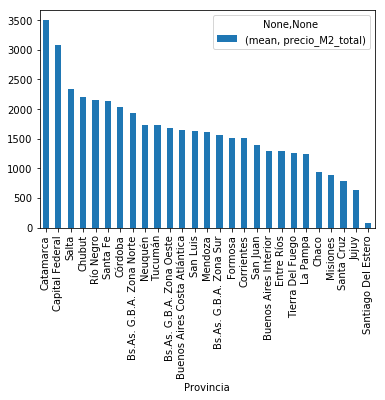

In [ ]:
#precio_m2_total promedio por Provincia
pvt_m2_covered = data_final.pivot_table(values='precio_M2_total',index='Provincia',aggfunc=['mean']).round(2).sort_values(by=('mean','precio_M2_total'),ascending=False)
pvt_m2_covered.plot(kind='bar');

# Columna: precio_m2_covered

In [ ]:
data_final['precio_M2_covered'] = pd.Series(data_final.price_aprox_usd/data_final.surface_covered_in_m2)

C:\Users\Agustin Esposito\.conda\envs\dhsblend2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_final.dtypes

price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
Provincia                 object
Barrio                    object
propiedad_PH               uint8
propiedad_apartment        uint8
propiedad_house            uint8
propiedad_store            uint8
precio_M2_total          float64
precio_M2_covered        float64
dtype: object

In [ ]:
data_final.shape

(73047, 11)

In [ ]:
data_final.pivot_table(values='precio_M2_covered',index='Provincia',aggfunc=['count','min','max','mean']).round(2).sort_values(by=('mean','precio_M2_covered'),ascending=False)

,count,min,max,mean
,precio_M2_covered,precio_M2_covered,precio_M2_covered,precio_M2_covered
Provincia,,,,
San Luis,114,280.42,233333.33,5013.62
Catamarca,14,471.86,9166.67,3569.43
Capital Federal,25355,24.21,206333.33,3381.34
Chubut,41,678.91,30992.54,3327.57
Salta,63,426.09,23750.00,2759.53
Santa Fe,4565,9.39,74571.21,2469.63
Río Negro,163,65.21,12727.27,2363.00
Bs.As. G.B.A. Zona Norte,18118,50.28,54333.25,2356.94


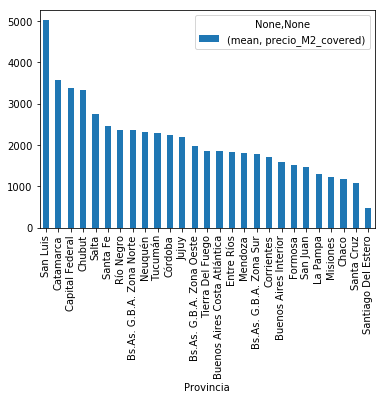

In [ ]:
#precio_m2_covered promedio por Provincia
pvt_m2_covered = data_final.pivot_table(values='precio_M2_covered',index='Provincia',aggfunc=['mean']).round(2).sort_values(by=('mean','precio_M2_covered'),ascending=False)
pvt_m2_covered.plot(kind='bar');

# 5) Analisis de outliers en las columnas precio_M2_total y precio_M2_covered

## Columna: 'precio_M2_total'

In [ ]:
round(data_final.precio_M2_total.describe(),2)

count     73047.00
mean       2251.14
std        2836.39
min           2.07
25%        1312.50
50%        1891.89
75%        2536.66
max      206333.33
Name: precio_M2_total, dtype: float64

In [ ]:
max_m2_total = data_final.precio_M2_total.sort_values(ascending=False)[:11]
max_indices_m2_total = max_m2_total.index
max_m2_total

26637     206333.33
26037     173826.07
26193     104486.11
114131     80000.00
25853      78533.33
44906      57382.08
27004      48296.22
27066      48296.22
26992      48296.22
27065      45640.00
27001      45640.00
Name: precio_M2_total, dtype: float64

In [ ]:
min_m2_total =data_final.precio_M2_total.sort_values(ascending=True)[:11]
min_m2_total

44246    2.07
8758     3.00
59960    4.17
71991    4.43
36474    5.61
38497    6.80
50693    7.00
45653    8.57
44236    8.89
17204    9.39
32198    9.79
Name: precio_M2_total, dtype: float64

In [ ]:
# Visualizo los valores maximos del precio_m2_total con la posicion de los valores obtenidos en el punto anterior
data_final.loc[max_indices_m2_total,['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','Provincia','Barrio','precio_M2_total','precio_M2_covered']].round(2)

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,Provincia,Barrio,precio_M2_total,precio_M2_covered
26637,6809000.0,33.0,33.0,Capital Federal,Boedo,206333.33,206333.33
26037,5214782.0,30.0,30.0,Capital Federal,Boedo,173826.07,173826.07
26193,3657014.0,35.0,35.0,Capital Federal,Boedo,104486.11,104486.11
114131,12000000.0,150.0,85.0,Bs.As. G.B.A. Zona Oeste,Ituzaingó,80000.00,141176.47
25853,2356000.0,30.0,30.0,Capital Federal,Boedo,78533.33,78533.33
44906,1434552.0,25.0,25.0,Santa Fe,Rosario,57382.08,57382.08
27004,2173330.0,45.0,40.0,Bs.As. G.B.A. Zona Norte,General San Martín,48296.22,54333.25
27066,2173330.0,45.0,40.0,Bs.As. G.B.A. Zona Norte,General San Martín,48296.22,54333.25
26992,2173330.0,45.0,40.0,Bs.As. G.B.A. Zona Norte,General San Martín,48296.22,54333.25
27065,2099440.0,46.0,42.0,Bs.As. G.B.A. Zona Norte,General San Martín,45640.00,49986.67


In [ ]:
## Analizamos por Capital Federal
mascara_cf = data_final.Provincia == 'Capital Federal'
data_final_cf = data_final.loc[mascara_cf,:]

pivot_cf = data_final_cf.pivot_table(values='precio_M2_total',index='Barrio',aggfunc=['mean']).sort_values(by=('mean','precio_M2_total'),ascending=False)
pivot_cf

,mean
,precio_M2_total
Barrio,
Boedo,10254.357313
San Cristobal,8678.630513
Puerto Madero,6065.857119
Las Cañitas,3503.938915
Palermo,3361.233586
Recoleta,3319.083149
Nuñez,3169.304195
Belgrano,3137.390587


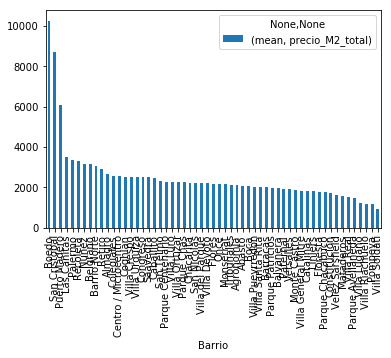

In [ ]:
pivot_cf.plot(kind='bar');

## Columna: 'precio_M2_covered'

In [ ]:
max_m2_covered = data_final.precio_M2_covered.sort_values(ascending=False)[:11]
max_indices_m2_covered = max_m2_total.index
max_m2_covered

25353     233333.333333
26637     206333.333333
26037     173826.066667
114131    141176.470588
26193     104486.114286
25853      78533.333333
45689      74571.214765
44906      57382.080000
26992      54333.250000
27004      54333.250000
27066      54333.250000
Name: precio_M2_covered, dtype: float64

In [ ]:
min_m2_covered =data_final.precio_M2_covered.sort_values(ascending=True)[:11]
min_m2_covered

17204     9.388501
17301    17.759817
28152    22.107656
65611    24.207190
66626    26.273587
44245    34.107637
35801    36.142800
29170    39.950000
46709    49.000000
54417    50.279330
54416    51.111111
Name: precio_M2_covered, dtype: float64

In [ ]:
## Visualizo los valores maximos del precio_m2_covered con la posicion de los valores obtenidos en el punto anterior
data_final.loc[max_indices_m2_covered,:]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,Provincia,Barrio,propiedad_PH,propiedad_apartment,propiedad_house,propiedad_store,precio_M2_total,precio_M2_covered
26637,6809000.0,33.0,33.0,Capital Federal,Boedo,0,1,0,0,206333.33,206333.333333
26037,5214782.0,30.0,30.0,Capital Federal,Boedo,0,1,0,0,173826.07,173826.066667
26193,3657014.0,35.0,35.0,Capital Federal,Boedo,0,1,0,0,104486.11,104486.114286
114131,12000000.0,150.0,85.0,Bs.As. G.B.A. Zona Oeste,Ituzaingó,0,0,1,0,80000.00,141176.470588
25853,2356000.0,30.0,30.0,Capital Federal,Boedo,0,1,0,0,78533.33,78533.333333
44906,1434552.0,25.0,25.0,Santa Fe,Rosario,0,0,0,1,57382.08,57382.080000
27004,2173330.0,45.0,40.0,Bs.As. G.B.A. Zona Norte,General San Martín,0,1,0,0,48296.22,54333.250000
27066,2173330.0,45.0,40.0,Bs.As. G.B.A. Zona Norte,General San Martín,0,1,0,0,48296.22,54333.250000
26992,2173330.0,45.0,40.0,Bs.As. G.B.A. Zona Norte,General San Martín,0,1,0,0,48296.22,54333.250000
27065,2099440.0,46.0,42.0,Bs.As. G.B.A. Zona Norte,General San Martín,0,1,0,0,45640.00,49986.666667


In [ ]:
## Analizamos por Capital Federal
mascara_cf = data_final.Provincia == 'Capital Federal'
data_final_cf = data_final.loc[mascara_cf,:]

pivot_cf = data_final_cf.pivot_table(values='precio_M2_covered',index='Barrio',aggfunc=['mean']).sort_values(by=('mean','precio_M2_covered'),ascending=False)
pivot_cf

,mean
,precio_M2_covered
Barrio,
Boedo,10368.997962
San Cristobal,8782.092979
Puerto Madero,6473.412752
Las Cañitas,3890.455785
Palermo,3751.363031
Nuñez,3678.878431
Recoleta,3638.790169
Belgrano,3528.440136


En los casos de Capital Federal donde se encuentran los valores mas grandes, decidimos chequear bien en que Barrio los precios por M2_total y M2_covered estaban claramente por encima de su valor real. Tanto en M2_total y M2_covered (que no difieren demasiado) **Boedo** y **San Cristobal** superaban los 8mil dolares por M2.

# 6) Filtro de outliers en las columnas precio_M2_total y precio_M2_covered

## Calculamos y filtramos los outliers de los valores minimos y maximos

In [ ]:
# Creamos las boolean mask de precio_M2_total y precio_M2_covered
mayor_9mil_precio_total_mask = data_final.precio_M2_total > 8500
mayor_9mil_precio_covered_mask = data_final.precio_M2_covered > 8500

print('Total de valores que superan los 9 mil por M2_total: ',mayor_9mil_precio_total_mask.sum())
print('Total de valores que superan los 9 mil por M2_covered: ',mayor_9mil_precio_covered_mask.sum())

Total de valores que superan los 9 mil por M2_total:  1090
Total de valores que superan los 9 mil por M2_covered:  1218


In [ ]:
# Creamos las boolean mask de precio_M2_total y precio_M2_covered
menor_9mil_precio_total_mask = data_final.precio_M2_total < 8500
menor_9mil_precio_covered_mask = data_final.precio_M2_covered < 8500


outliers_price_m2 = np.logical_and(menor_9mil_precio_total_mask,menor_9mil_precio_covered_mask)
print('Total de valores validos: ',outliers_price_m2.sum())

Total de valores validos:  71827


In [ ]:
# Visualizamos el dataset filtrado
data_final_2 = data_final[outliers_price_m2]

#Comparamos los registros del dataset antes y despues del filtrado de outliers
print(data_final_2.shape,'\n')
print(data_final.shape)

(71827, 11) 

(73047, 11)


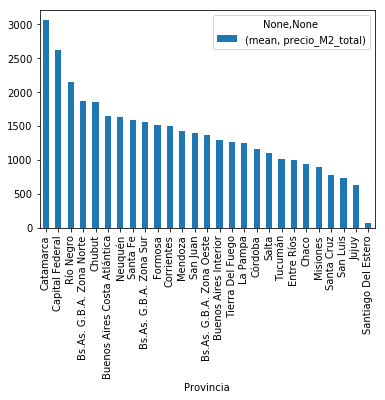

In [ ]:
#Volvemos a visualizar el precio_M2_total
#precio_m2_covered promedio por Provincia
pvt_m2_total = data_final_2.pivot_table(values='precio_M2_total',index='Provincia',aggfunc=['mean']).round(2).sort_values(by=('mean','precio_M2_total'),ascending=False)
pvt_m2_total.plot(kind='bar');

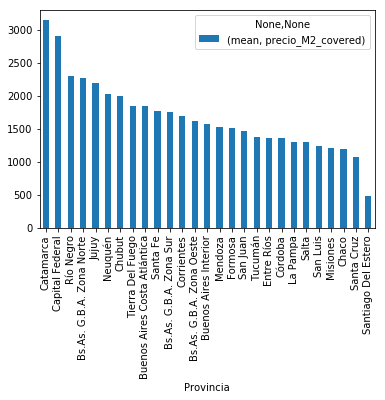

In [ ]:
#Volvemos a visualizar el precio_M2_covered
#precio_m2_covered promedio por Provincia
pvt_m2_total = data_final_2.pivot_table(values='precio_M2_covered',index='Provincia',aggfunc=['mean']).round(2).sort_values(by=('mean','precio_M2_covered'),ascending=False)
pvt_m2_total.plot(kind='bar');

In [ ]:
#mascara_ct = data_final_2.Provincia == 'Catamarca'
#data_final_ct = data_final_2.loc[mascara_ct,:]
#pivot_ct = data_final_ct.pivot_table(values=['precio_M2_covered','precio_M2_total'],index='Barrio',aggfunc=['mean','count']).sort_values(by=('mean','precio_M2_covered'),ascending=False)
#pivot_ct

In [ ]:
#mascara_sl = data_final_2.Provincia == 'San Luis'
#data_final_sl = data_final_2.loc[mascara_sl,:]
#pivot_sl = data_final_sl.pivot_table(values='precio_M2_covered',index='Barrio',aggfunc=['mean']).sort_values(by=('mean','precio_M2_covered'),ascending=False)
#pivot_sl